In [1]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pysumma as ps
import xarray as xr
import numpy as np

In [2]:
# define the base path so that we won't have to type this over and over
path_base = os.getcwd()
path_base

'/Users/pdas47/courses/cewa564/cewa564_bow'

# Let's have a look at the different configurations

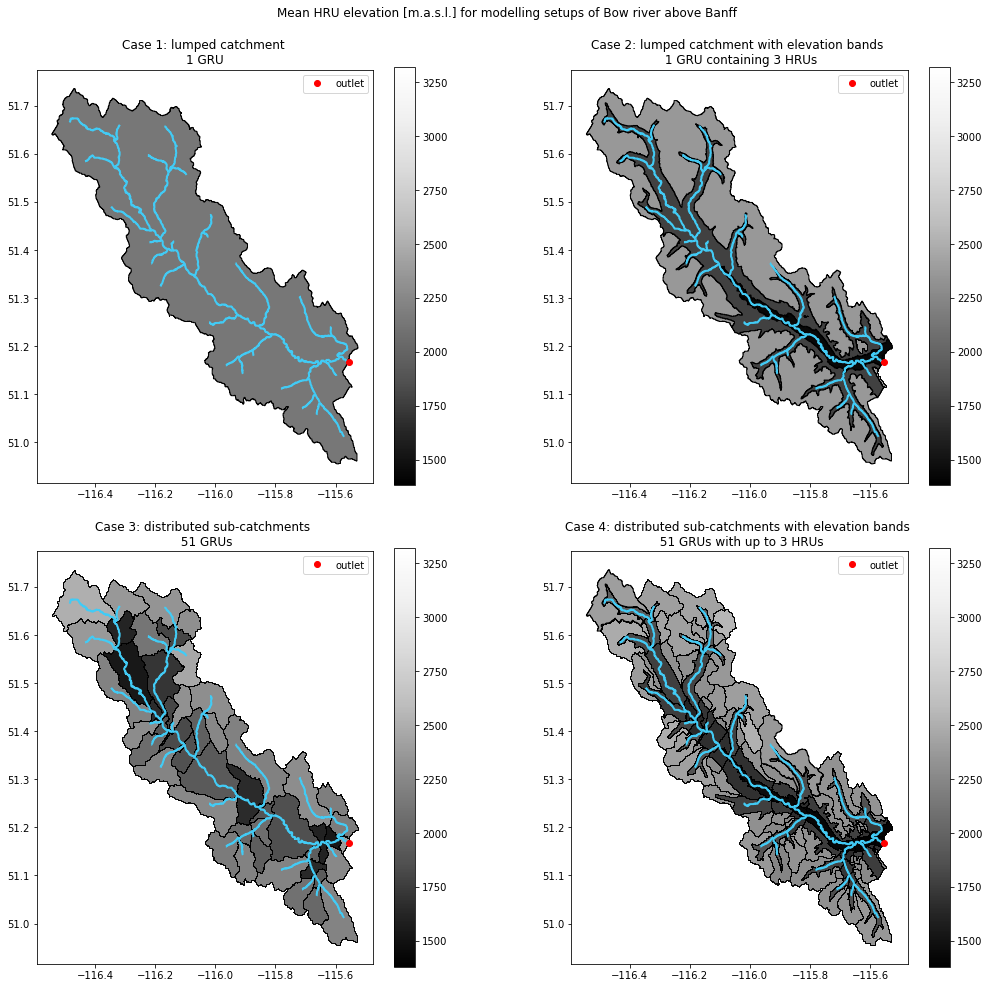

In [15]:
# Specify shape file locations
path_shp_lumped           = os.path.join(path_base, 'data/bow/topography/lumped/bow_lumped.shp')
path_shp_lumped_elev      = os.path.join(path_base, 'data/bow/topography/lumped_elevationBands/bow_lumped_elevation_zone.shp')
path_shp_distributed      = os.path.join(path_base, 'data/bow/topography/distributed/bow_distributed.shp')
path_shp_distributed_elev = os.path.join(path_base, 'data/bow/topography/distributed_elevationBands/bow_distributed_elevation_zone.shp')
path_shp_river_network    = os.path.join(path_base, 'data/bow/topography/river_network/bow_river_network_from_merit_hydro.shp')

# Load the shapes
shp_lumped      = gpd.read_file(path_shp_lumped)
shp_lumped_elev = gpd.read_file(path_shp_lumped_elev)
shp_dist        = gpd.read_file(path_shp_distributed)
shp_dist_elev   = gpd.read_file(path_shp_distributed_elev)
shp_network     = gpd.read_file(path_shp_river_network)

# make a helpful function that can be used to plot the data
def plot_cases(basin_shape,ax,title_string):
    
    vmin, vmax = 1380,3320 # [m]
    basin_shape.plot(ax=ax, column='hru_elev', facecolor='w', edgecolor='k', cmap='Greys_r', legend=True, vmin=vmin, vmax=vmax); # basin discretization
    shp_network.plot(ax=ax, linewidth=2, color=(66/255,203/255,245/255)); # river network (the same for all cases)
    ax.plot(-115.555,51.167,linestyle='None',marker='o',color='r',label='outlet') # outlet (the same for all cases)
    ax.legend()
    ax.set_title(title_string)
    
    for im in plt.gca().get_images():
        im.set_clim(vmin, vmax)
    
    return

# Prepare a figure
fig, ax = plt.subplots(2,2,figsize=(14,14));
fig.tight_layout()
fig.suptitle('Mean HRU elevation [m.a.s.l.] for modelling setups of Bow river above Banff')
fig.subplots_adjust(top=0.92, wspace=0.27, hspace=0.15) # move stuff around a bit

# plot the 4 cases
plot_cases(shp_lumped,     ax[0,0],'Case 1: lumped catchment \n1 GRU')
plot_cases(shp_lumped_elev,ax[0,1],'Case 2: lumped catchment with elevation bands \n 1 GRU containing 3 HRUs')
plot_cases(shp_dist,       ax[1,0],'Case 3: distributed sub-catchments \n 51 GRUs')
plot_cases(shp_dist_elev,  ax[1,1],'Case 4: distributed sub-catchments with elevation bands \n 51 GRUs with up to 3 HRUs')

# Let's look at the outputs now [LUMPED]

In [4]:
# define the output paths
# -- SUMMA results
path_sim_lumped            = os.path.join(path_base, 'output/bow/lumped/bow_lumped_default_timestep.nc')
# path_sim_lumped_elev       = path_base + 'output/bow/lumped_elevationBands/bow_lumped_elev_default_timestep.nc'
# path_sim_distr             = path_base + 'output/bow/distributed/bow_distributed_default_timestep.nc'
# path_sim_distr_elev        = path_base + 'output/bow/distributed_elevationBands/bow_distributed_elev_default_timestep.nc'

# # -- mizuRoute results (contains streamflow only)
# path_sim_distr_routed      = path_base + 'output/bow/distributed/bow_distributed_routed.nc'
# path_sim_distr_elev_routed = path_base + 'output/bow/distributed_elevationBands/bow_distributed_elev_routed.nc'

In [5]:
# load the SUMMA simulations, we won't need the routing results for SWE analysis
sim_lumped      = xr.open_dataset(path_sim_lumped)
# sim_lumped_elev = xr.open_dataset(path_sim_lumped_elev)
# sim_distr       = xr.open_dataset(path_sim_distr)
# sim_distr_elev  = xr.open_dataset(path_sim_distr_elev)

In [6]:
# make the plot
# plt.figure(figsize=(30,7));

# sim_lumped['2010-01-01':'2011-01-01'].scalarSWE.plot(color='r', label='Case 1: lumped', linewidth=3);
# # sim_lumped_elev.scalarSWE.plot.line(x='time', color='grey'); # not plotting labels for these helps with memory usage
# # sim_lumped_elev.scalarSWE.mean(dim='hru').plot(color='b', label='Case 2: average of elevation bands (individual bands in grey)', linewidth=3)

# plt.legend(loc='upper left'); # forcing the legend in a specific location helps with memory usage
# plt.ylabel('simulated SWE [kg m-2]');


# sim_lumped.sel(time='2010-01-01').scalarSWE.mean()
daily_lumped_swe = sim_lumped['scalarSWE'].resample(time='1D').mean()

In [7]:
# Get Min and Max for setting up the color range
MIN = float(daily_lumped_swe.min())
MAX = float(daily_lumped_swe.max())

MIN, MAX

(0.0, 721.38232421875)

In [9]:
# make a helpful function that can be used to plot the data
def plot_scene(basin_shape, title_string, MIN, MAX, savepath):
    fig, ax = plt.subplots(figsize=(6,6))
    vmin, vmax = MIN,MAX # [m]
    
#     pl = basin_shape.plot(ax=ax, column='swe', edgecolor='k', cmap='PuBu', legend=True, vmin=vmin, vmax=vmax, label="SWE"); # basin discretization
    
    pl = basin_shape.plot(ax=ax, column='swe', linewidth=0.3, edgecolor='k', cmap='PuBu', vmin=vmin, vmax=vmax); # basin discretization
    shp_network.plot(ax=ax, linewidth=1, color=(66/255,203/255,245/255)); # river network (the same for all cases)
    ax.plot(-115.555,51.167,linestyle='None',marker='o',color='r',label='outlet') # outlet (the same for all cases)
    ax.legend()
    ax.set_title(title_string)
    
    # add colorbar
    cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
    for swe_val, col in zip(basin_shape['swe'], ['red', 'pink', 'purple']):
        plt.axhline(swe_val, linewidth=4, color=col)
    sm = plt.cm.ScalarMappable(cmap='PuBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # fake up the array of the scalar mappable. Urgh...
    sm._A = []
    fig.colorbar(sm, cax=cax)
    
    fig.savefig(savepath)
    plt.close(fig)

In [10]:
# import time
# from tqdm import notebook

# output_dir = './output/bow/lumped/plots'
# if not os.path.isdir(output_dir):
#     os.makedirs(output_dir)

# i = 0
# with notebook.tqdm(total=len(daily_lumped_swe)) as pbar:
#     for swe in daily_lumped_swe:
#         d = swe.time.dt.strftime("%Y-%m-%d").values
#         pbar.set_description(f"Processing {d}")
#         swe_val = float(swe)
#         shp_lumped['swe'] = swe_val

#         savepath = os.path.join(output_dir, f'{d}.jpg')
#         plot_scene(shp_lumped, f"Lumped - Mean SWE on ({d}) = {swe_val:.3f} $kg m^{{-2}}$", MIN, MAX, savepath)
#         pbar.update(1)

# Let's look at the outputs now [LUMPED Elevation]

In [16]:
# define the output paths
# -- SUMMA results

path_sim_lumped_elev       = os.path.join(path_base, 'output/bow/lumped_elevationBands/bow_lumped_elev_default_timestep.nc')

In [17]:
# load the SUMMA simulations, we won't need the routing results for SWE analysis

sim_lumped_elev = xr.open_dataset(path_sim_lumped_elev)

In [18]:
# gpd.concat(shp_lumped_elev, sim_lumped_elev['scalarSWE'].sel(time='2010-01-01').mean(dim='time').to_dataframe())
mean_swe = sim_lumped_elev['scalarSWE'].sel(time='2010-01-01').mean(dim='time').to_dataframe()
temp = shp_lumped_elev.merge(mean_swe, left_on='ID_target', right_on='hru').rename({'scalarSWE':'swe'}, axis='columns')
temp

,ID_source,S_1_area,ele_source,lat_source,lon_source,AS1,IDS1,ele_target,AS2,ID_target,AINT,AP1,AP2,AP1N,weight,lon_target,lat_target,hru_elev,geometry,swe
0,1,2.216040e+09,2137.14695,51.360655,-116.012226,0.285974,0,1250,4.058426,1,0.013157,0.046008,0.003242,0.046008,1.0,-115.783528,51.222626,1434.524167,"MULTIPOLYGON (((-116.10208 51.37125, -116.1012...",166.645294
1,1,2.216040e+09,2137.14695,51.360655,-116.012226,0.285974,0,1750,2.460443,2,0.089935,0.314489,0.036553,0.314489,1.0,-116.004965,51.342221,1778.429478,"MULTIPOLYGON (((-116.44208 51.58208, -116.4420...",144.776611
2,1,2.216040e+09,2137.14695,51.360655,-116.012226,0.285974,0,3000,2.448478,3,0.182881,0.639504,0.074692,0.639504,1.0,-116.032250,51.379650,2364.601134,"MULTIPOLYGON (((-115.57625 51.09292, -115.5837...",283.829681


In [19]:
import time
from tqdm import notebook

output_dir = './output/bow/lumped_elevationBands/plots'
if not os.path.isdir(output_dir):
    os.makedirs(output_dir)


daily_lumped_elev_swe = sim_lumped_elev['scalarSWE'].resample(time='1D').mean()#.sel(time=slice('2000-10-10', '2003-01-01'))

MIN, MAX = daily_lumped_elev_swe.min(), daily_lumped_elev_swe.max()

reset = shp_lumped_elev
with notebook.tqdm(total=len(daily_lumped_elev_swe)) as pbar:
    for swe in daily_lumped_elev_swe:
        d = swe.time.dt.strftime("%Y-%m-%d").values
        pbar.set_description(f"Processing {d}")
        
        shp_lumped_elev = reset
        mean_swe = swe.to_dataframe()
        shp_lumped_elev = shp_lumped_elev.merge(mean_swe, left_on='ID_target', right_on='hru').rename({'scalarSWE':'swe'}, axis='columns')

        savepath = os.path.join(output_dir, f'{d}.jpg')
        swe_val = mean_swe.mean(axis=0, numeric_only=True).values[0]
        plot_scene(shp_lumped_elev[['geometry', 'swe']], f"Lumped Elevation - Mean SWE on ({d}) = {swe_val:.3f} $kg m^{{-2}}$", MIN, MAX, savepath)
        pbar.update(1)

  0%|          | 0/4748 [00:00<?, ?it/s]

# Mean SWE for the overall basin

In [100]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
lumped = xr.open_dataset('./output/bow/lumped/bow_lumped_default_timestep.nc')
distributed = xr.open_dataset('./output/bow/distributed/bow_distributed_default_timestep.nc')
lumped_elev = xr.open_dataset('./output/bow/lumped_elevationBands/bow_lumped_elev_default_timestep.nc')
distributed_elev = xr.open_dataset('./output/bow/distributed_elevationBands/bow_distributed_elev_default_timestep.nc')

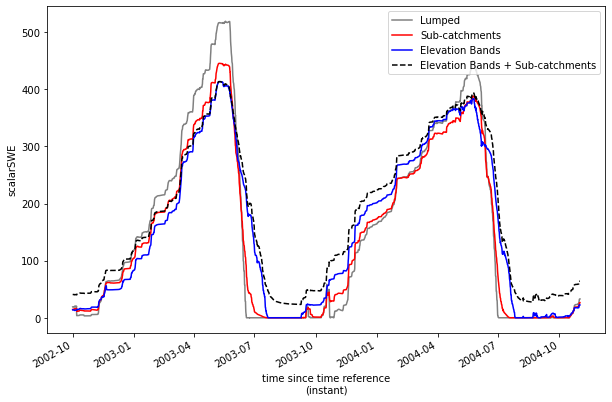

In [48]:
start = '2002-10'
end = '2004-10'
var = 'scalarSWE'

plt.figure(figsize=(10, 6))

lumped.mean(dim='hru')[var].sel(time=slice(start,end)).plot(label="Lumped", color="gray")
distributed.mean(dim='hru')[var].sel(time=slice(start,end)).plot(label="Sub-catchments", color="red")
lumped_elev.mean(dim='hru')[var].sel(time=slice(start,end)).plot(label="Elevation Bands", color="blue")
distributed_elev.mean(dim='hru')[var].sel(time=slice(start,end)).plot(label="Elevation Bands + Sub-catchments", color="black", linestyle="--")
plt.legend()

# What if we want to look at the determined SWE at certain locations in the basin

In [183]:
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt

In [165]:
# Let's first have a look at the spatial discretizations
lumped_shp = gpd.read_file('./data/bow/topography/lumped/bow_lumped.shp', crs='EPSG:4326')
distributed_shp = gpd.read_file('./data/bow/topography/distributed/bow_distributed.shp', crs='EPSG:4326')
lumped_elev_shp = gpd.read_file('./data/bow/topography/lumped_elevationBands/bow_lumped_elevation_zone.shp', crs='EPSG:4326')
distributed_elev_shp = gpd.read_file('./data/bow/topography/distributed_elevationBands/bow_distributed_elevation_zone.shp', crs='EPSG:4326')
river_network_shp = gpd.read_file('./data/bow/topography/river_network/bow_river_network_from_merit_hydro.shp')

<AxesSubplot:>

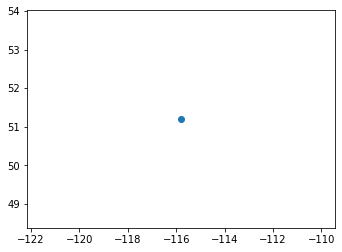

In [166]:
df = pd.DataFrame({'x': [look_where[0]], 'y': [look_where[1]]})

# geometry = geopandas.points_from_xy(x=[1, 0], y=[0, 1])
# geometry = geopandas.points_from_xy(df['x'], df['y'], df['z'])
sample_pt = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['x'], df['y']), crs='EPSG:4326')
sample_pt.plot()
# gpd.points_from_xy([look_where[1]], [look_where[0]])

In [324]:
# make a helpful function that can be used to plot the data
def plot_cases(basin_shape, sample, ax,title_string):
    vmin, vmax = 1380,3320 # [m]
#     if type(sample) is tuple:
#         df = pd.DataFrame({'x': [sample[0]], 'y': [sample[1]]})
#         sample = gpd.GeoDataFrame(
#             df, geometry=gpd.points_from_xy(df['x'], df['y']), crs='EPSG:4326')
        
#     sample_pt.plot(ax=ax, color='red', markersize=10);
    basin_shape.plot(ax=ax, column='hru_elev', facecolor='w', edgecolor='k', cmap='Greys_r', legend=True, vmin=vmin, vmax=vmax); # basin discretization
    ax.scatter(sample[0],sample[1],s=200,marker='*',color='r',label='Sampling Location') # outlet (the same for all cases)    
    river_network_shp.plot(ax=ax, linewidth=2, color=(66/255,203/255,245/255)); # river network (the same for all cases)
    ax.plot(-115.555,51.167,linestyle='None',marker='o',color='r',label='outlet') # outlet (the same for all cases)

    ax.legend()
    ax.set_title(title_string)
    
    for im in plt.gca().get_images():
        im.set_clim(vmin, vmax)
    
    return

# # Prepare a figure
# fig, ax = plt.subplots(2,2,figsize=(14,14));
# fig.tight_layout()
# fig.suptitle('Mean HRU elevation [m.a.s.l.] for modelling setups of Bow river above Banff')
# fig.subplots_adjust(top=0.92, wspace=0.27, hspace=0.15) # move stuff around a bit

# # plot the 4 cases
# plot_cases(lumped_shp,      sample_pt, ax[0,0],'Case 1: lumped catchment \n1 GRU')
# plot_cases(lumped_elev_shp, sample_pt, ax[0,1],'Case 2: lumped catchment with elevation bands \n 1 GRU containing 3 HRUs')
# plot_cases(distributed_shp, sample_pt, ax[1,0],'Case 3: distributed sub-catchments \n 51 GRUs')
# plot_cases(distributed_elev_shp, sample_pt, ax[1,1],'Case 4: distributed sub-catchments with elevation bands \n 51 GRUs with up to 3 HRUs')

# plt.tight_layout()

In [325]:
def get_hru(x, y, shp):
    df = pd.DataFrame({'x': [sample[0]], 'y': [sample[1]]})
    sample_pt = gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df['x'], df['y']), crs='EPSG:4326')
    feature = gpd.sjoin(shp, sample_pt)
    return feature.index[0]+1

/opt/homebrew/Caskroom/miniconda/base/envs/bowname/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """


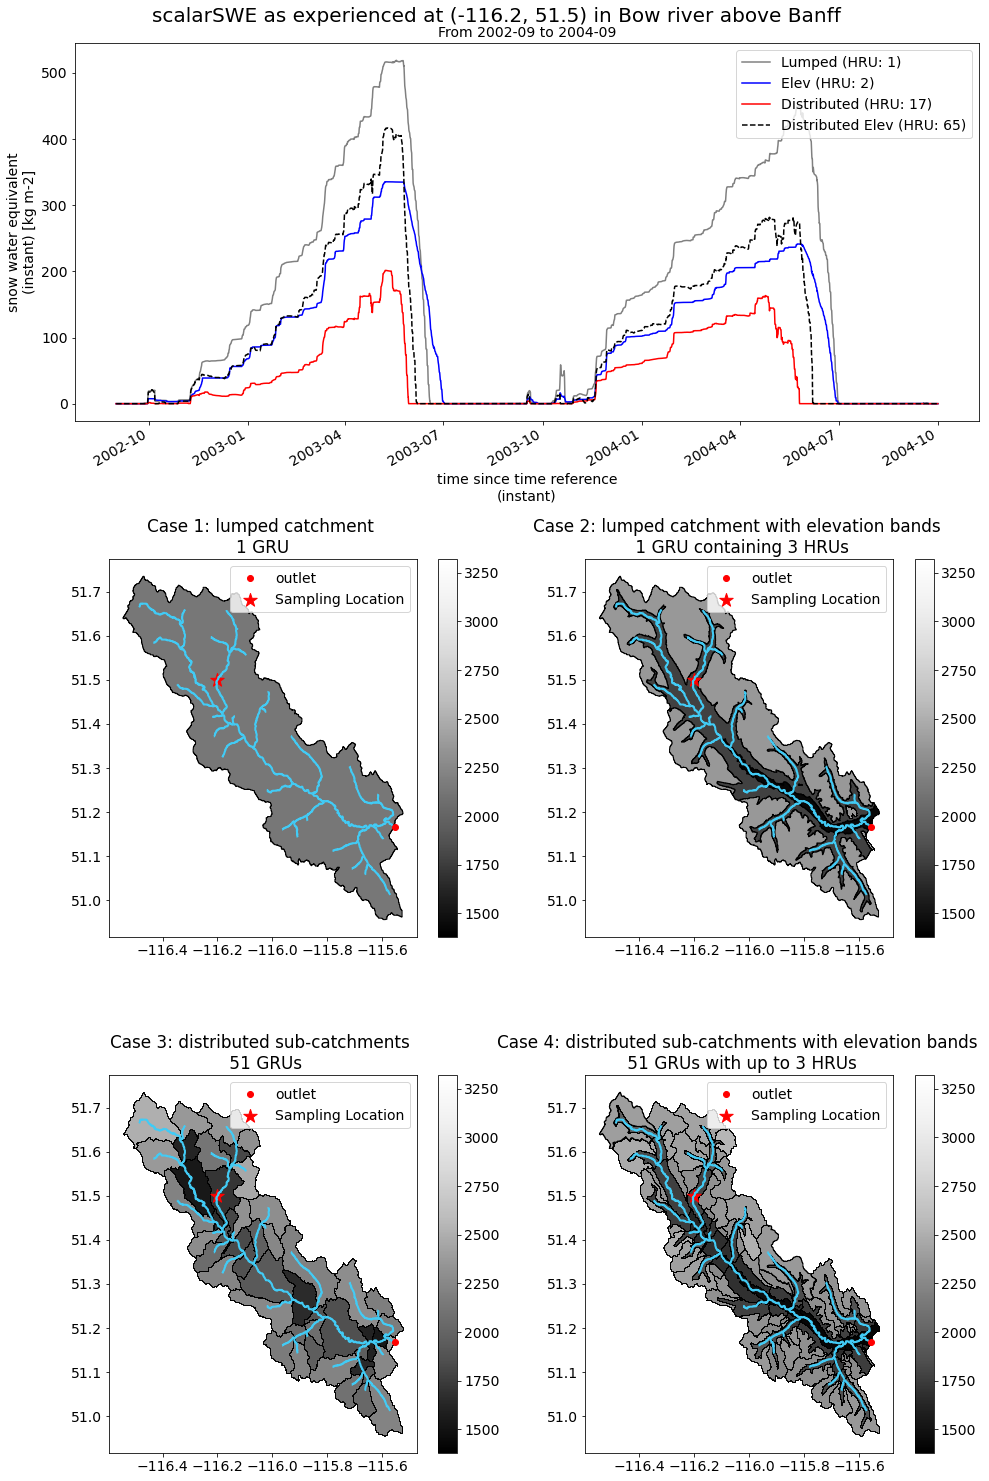

In [326]:
# This will plot a variable for all the spatial representations for a given sample point from a start date to an enddate
start = '2002-09'
end = '2004-09'
var = 'scalarSWE'
sample = (-116.2, 51.5)

fig = plt.figure(figsize=(14, 7+14))
ax = plt.subplot(3, 2, (1, 2))

plt.rcParams.update({
    'font.size': 14
})

def plot_var(ds, sample, ds_shp, starttime, endtime, var, label, **kwargs):
    hru_target = get_hru(sample[0], sample[1], ds_shp)
    ds.sel(hru=hru_target, time=slice(starttime, endtime))[var].plot(label=f"{label} (HRU: {hru_target})", **kwargs)

    return ax

ax = plot_var(lumped, sample, lumped_shp, start, end, var, ax=ax, label='Lumped', color='grey')
ax = plot_var(lumped_elev, sample, lumped_elev_shp, start, end, var, ax=ax, label='Elev', color='blue')
ax = plot_var(distributed, sample, distributed_shp, start, end, var, ax=ax, label='Distributed', color='red')
ax = plot_var(distributed_elev, sample, distributed_elev_shp, start, end, var, ax=ax, label='Distributed Elev', color='black', linestyle='--')

plt.legend(loc='upper right')
plt.title(f"From {start} to {end}", size=14)


# Prepare a figure
# fig, ax = plt.subplots(2,2,figsize=(14,14));
# fig.tight_layout()
# fig.suptitle('Mean HRU elevation [m.a.s.l.] for modelling setups of Bow river above Banff')
fig.suptitle(f'{var} as experienced at {sample[0], sample[1]} in Bow river above Banff', fontsize=20)

# plot the 4 cases
axs = [
    [plt.subplot(3, 2, 3), plt.subplot(3, 2, 4)],
    [plt.subplot(3, 2, 5), plt.subplot(3, 2, 6)]
]
plot_cases(lumped_shp,      sample, axs[0][0],'Case 1: lumped catchment \n1 GRU')
plot_cases(lumped_elev_shp, sample, axs[0][1],'Case 2: lumped catchment with elevation bands \n 1 GRU containing 3 HRUs')
plot_cases(distributed_shp, sample, axs[1][0],'Case 3: distributed sub-catchments \n 51 GRUs')
plot_cases(distributed_elev_shp, sample, axs[1][1],'Case 4: distributed sub-catchments with elevation bands \n 51 GRUs with up to 3 HRUs')

plt.tight_layout()